In [257]:
library(tidyverse)

In [258]:
correlation_file_name <- "ci5_cs1e9_correlation"
#"ci5_cs1e9_correlation" 
#all_germline_ci5_cs1e9_correlation 
#all_germline_filtered_bams_tumor_ci5_cs1e9_correlation

In [259]:
paramspace <- read.csv("data/metadata/paramspace_cfDNA_phaseI.csv")

In [260]:
patients <- as.character(unique(paramspace$pt_id))

In [261]:
patients

[1] "C04689" "C04816" "C04837" "C04849" "C04873" "C04874" "C04886" "C04887"
 [9] "C05048" "C05073" "C05084" "C05118" "C05194" "C05234" "C05703"

In [262]:
correlation_per_patient <- data.frame(matrix(ncol = 3, nrow = 0))

colnames(correlation_per_patient) <-c("pt_id", "cfDNA_sample", "correlation")

In [263]:
for (i in patients){
    correlation_csv <- read.csv(paste("data/", i, "/", correlation_file_name, ".csv", sep = ""))
    for (j in correlation_csv$cfDNA_sample){
        correlation_row <- correlation_csv %>% filter(cfDNA_sample == j)
        correlation <- correlation_row$Correlation
        correlation_per_patient[nrow(correlation_per_patient)+1,] = c(i, j, correlation)
                                    
}}

In [264]:
correlation_per_patient <- correlation_per_patient %>% mutate(sampleID = str_sub(cfDNA_sample,1, 11))

In [265]:
correlation_per_patient

pt_id,cfDNA_sample,correlation,sampleID
C04689,C303A04689D_cfdna_N295-103,0.563668070054877,C303A04689D
C04689,C305A04689D_cfdna_N295-71,0.590268311208023,C305A04689D
C04689,C309A04689D_cfdna_N295-47,0.564624645732924,C309A04689D
C04689,C302A04689D_cfdna_N295-102,0.581573702909967,C302A04689D
C04689,C299A04689D_cfdna_N295-99,0.31635764207024,C299A04689D
C04689,C307A04689D_cfdna_N295-110,0.557531777601389,C307A04689D
C04689,C300A04689D_cfdna_N295-100,0.613636810049056,C300A04689D
C04689,C306A04689D_cfdna_N295-90,0.573176888674716,C306A04689D
C04689,C312A04689D_cfdna_N295-162,0.470066421984138,C312A04689D
C04689,C311A04689D_cfdna_N295-157,0.55143078469149,C311A04689D


In [266]:
sample_timepoint <- read.csv("data/metadata/clin_data/sample_timepoint_formatted.csv")
sample_timepoint_days <- sample_timepoint %>% filter(phase == "phaseI")
sample_timepoint_days <- sample_timepoint_days %>% select(sampleID, sample_timepoint_days_since_OP)

In [267]:
correlation_per_patient <- left_join(correlation_per_patient, sample_timepoint_days, by="sampleID")

In [268]:
correlation_per_patient

pt_id,cfDNA_sample,correlation,sampleID,sample_timepoint_days_since_OP
C04689,C303A04689D_cfdna_N295-103,0.563668070054877,C303A04689D,267
C04689,C305A04689D_cfdna_N295-71,0.590268311208023,C305A04689D,454
C04689,C309A04689D_cfdna_N295-47,0.564624645732924,C309A04689D,820
C04689,C302A04689D_cfdna_N295-102,0.581573702909967,C302A04689D,175
C04689,C299A04689D_cfdna_N295-99,0.31635764207024,C299A04689D,-1
C04689,C307A04689D_cfdna_N295-110,0.557531777601389,C307A04689D,637
C04689,C300A04689D_cfdna_N295-100,0.613636810049056,C300A04689D,37
C04689,C306A04689D_cfdna_N295-90,0.573176888674716,C306A04689D,539
C04689,C312A04689D_cfdna_N295-162,0.470066421984138,C312A04689D,1085
C04689,C311A04689D_cfdna_N295-157,0.55143078469149,C311A04689D,994


In [269]:
relapse_pt = c("C04849", "C04874", "C05084", "C05118", "C05234")

In [270]:
Correlation <- correlation_per_patient %>% mutate(Relapse = ifelse(pt_id %in% relapse_pt, "Relapse", "No_relapse"))

In [271]:
Correlation

pt_id,cfDNA_sample,correlation,sampleID,sample_timepoint_days_since_OP,Relapse
C04689,C303A04689D_cfdna_N295-103,0.563668070054877,C303A04689D,267,No_relapse
C04689,C305A04689D_cfdna_N295-71,0.590268311208023,C305A04689D,454,No_relapse
C04689,C309A04689D_cfdna_N295-47,0.564624645732924,C309A04689D,820,No_relapse
C04689,C302A04689D_cfdna_N295-102,0.581573702909967,C302A04689D,175,No_relapse
C04689,C299A04689D_cfdna_N295-99,0.31635764207024,C299A04689D,-1,No_relapse
C04689,C307A04689D_cfdna_N295-110,0.557531777601389,C307A04689D,637,No_relapse
C04689,C300A04689D_cfdna_N295-100,0.613636810049056,C300A04689D,37,No_relapse
C04689,C306A04689D_cfdna_N295-90,0.573176888674716,C306A04689D,539,No_relapse
C04689,C312A04689D_cfdna_N295-162,0.470066421984138,C312A04689D,1085,No_relapse
C04689,C311A04689D_cfdna_N295-157,0.55143078469149,C311A04689D,994,No_relapse


In [272]:
Correlation$correlation <- as.numeric(Correlation$correlation)

In [273]:
write.csv(Correlation, paste("data/", correlation_file_name, ".csv", sep = ""))

In [274]:
options(repr.plot.width=20, repr.plot.height=10)

Warning message:
“Removed 2 row(s) containing missing values (geom_path).”Warning message:
“Removed 2 rows containing missing values (geom_point).”

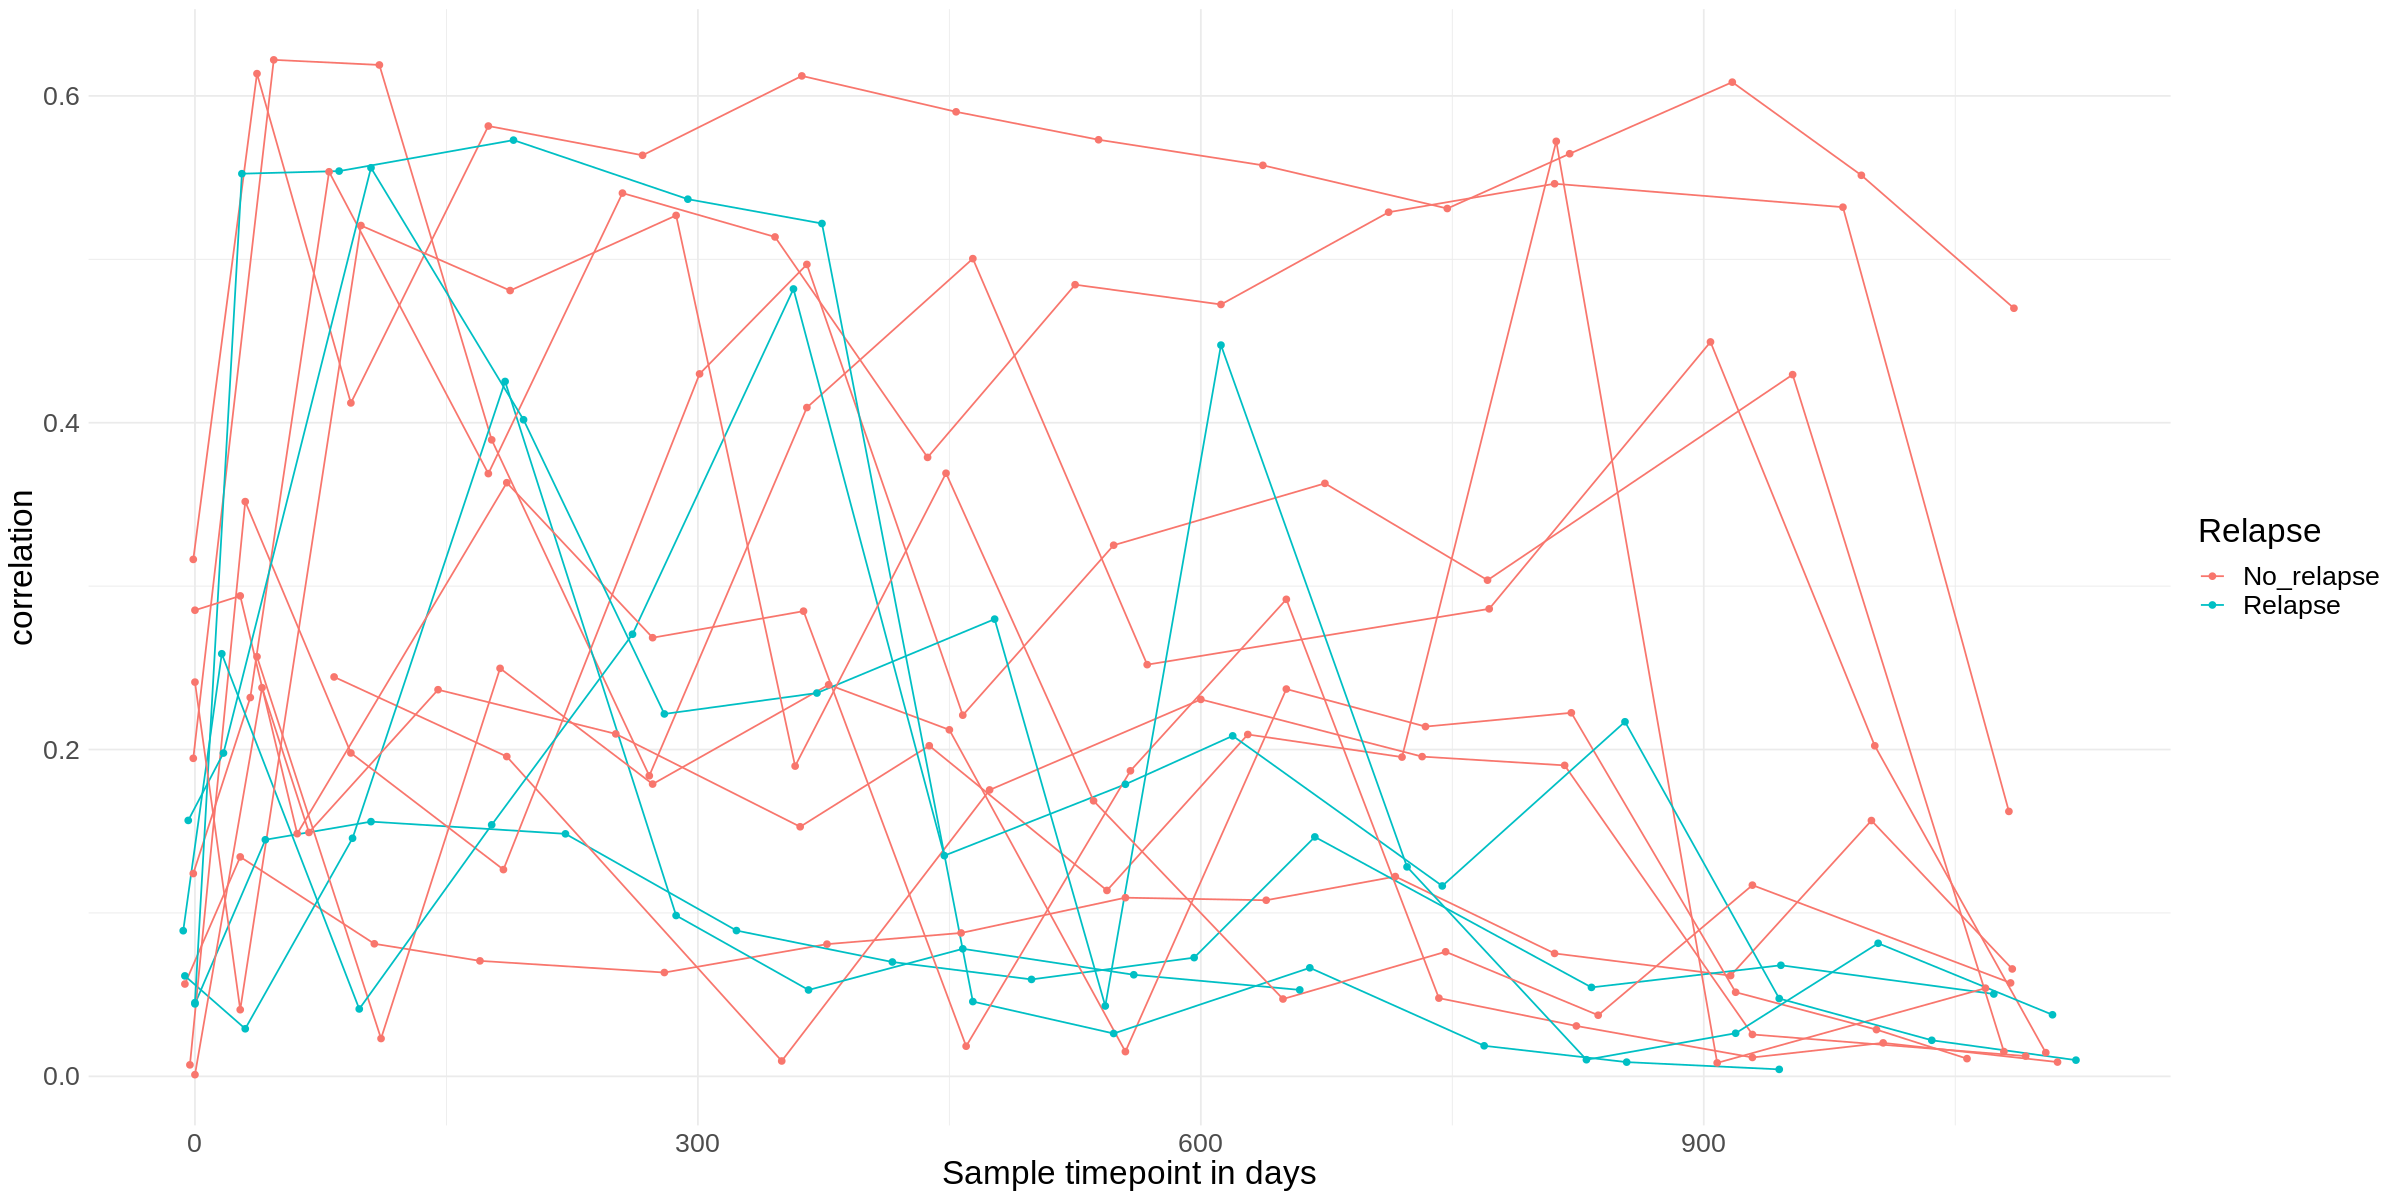

In [275]:
ggplot(data = Correlation)+
    geom_line(aes(x = sample_timepoint_days_since_OP, y = correlation, group = pt_id, color = Relapse))+
    #geom_line(aes(x = sample_timepoint_days_since_OP, y = Correlation, color = pt_id))+
    geom_point(aes(x = sample_timepoint_days_since_OP, y = correlation, color = Relapse))+
    theme_minimal()+
    xlab("Sample timepoint in days")+ theme(text = element_text(size = 20))    
    

In [276]:
ggsave(paste("plotting_results/Correlation_ctDNA_tumor_counts/", correlation_file_name, ".png", sep=""))

Saving 6.67 x 6.67 in image
Warning message:
“Removed 2 row(s) containing missing values (geom_path).”Warning message:
“Removed 2 rows containing missing values (geom_point).”